인구 공공데이터 준비하기

In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [2]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
f = open('/content/age.csv', 'r', encoding = 'cp949')
data = csv.reader(f)

for row in data:
  print(row)

신도림 데이터 확인하기

in 연산자를 활용해 우리 동네 이름이 포함된 지역명 찾기

In [6]:
print('신도림' in '서울특별시 구로구 신도림동(1153051000)')
print('1153' in '서울특별시 구로구 신도림동(1153051000)')
print('()' in '서울특별시 구로구 신도림동(1153051000)')
print('(' in '서울특별시 구로구 신도림동(1153051000)')

True
True
False
True


in 연산자를 활용해 우리 동네의 데이터 출력하기

In [7]:
# 3번 (우리 동네 데이터 확인) 해결
f = open('/content/age.csv', 'r', encoding = 'cp949')
data = csv.reader(f)

for row in data:
  if '신도림' in row[0]:
    print(row)

['서울특별시 구로구 신도림동(1153051000)', '37,268', '37,268', '326', '334', '406', '413', '389', '408', '417', '434', '411', '387', '420', '383', '354', '357', '340', '338', '349', '339', '407', '380', '390', '453', '424', '516', '451', '466', '448', '484', '471', '476', '558', '541', '579', '619', '638', '740', '756', '792', '745', '789', '671', '687', '700', '636', '726', '691', '657', '619', '649', '585', '579', '470', '522', '534', '563', '445', '511', '569', '572', '513', '532', '456', '426', '497', '379', '384', '399', '279', '289', '276', '268', '271', '223', '170', '150', '154', '177', '140', '126', '114', '121', '97', '86', '80', '59', '48', '44', '43', '28', '29', '22', '15', '13', '12', '5', '8', '5', '4', '2', '3', '7']


연령 별 인구수(0~100세 이상) 데이터 확인

In [9]:
# 4번 해결
f = open('/content/age.csv', 'r', encoding = 'cp949')
data = csv.reader(f)

for row in data:
  if '신도림' in row[0]:
    print(row[3:])      # 0 ~ 100세 이상 인구수 출력 row[0]: 지역명, row[1]: 총인구수, row[2]: 연령구간인구수, row[3]~  인덱스 부터 연령별 인구 수
    print(len(row[3:])) # 0 ~ 100세 이상 데이터 수 출력

['326', '334', '406', '413', '389', '408', '417', '434', '411', '387', '420', '383', '354', '357', '340', '338', '349', '339', '407', '380', '390', '453', '424', '516', '451', '466', '448', '484', '471', '476', '558', '541', '579', '619', '638', '740', '756', '792', '745', '789', '671', '687', '700', '636', '726', '691', '657', '619', '649', '585', '579', '470', '522', '534', '563', '445', '511', '569', '572', '513', '532', '456', '426', '497', '379', '384', '399', '279', '289', '276', '268', '271', '223', '170', '150', '154', '177', '140', '126', '114', '121', '97', '86', '80', '59', '48', '44', '43', '28', '29', '22', '15', '13', '12', '5', '8', '5', '4', '2', '3', '7']
101


우리 동네 연령별 인구수 result 리스트에 저장하기 -> 시각화를 위해

In [3]:
f = open('/content/age.csv', 'r', encoding = 'cp949')
data = csv.reader(f)

result = []   # 순서를 위해 인덱스가 있는 리스트로 담는다.

for row in data:
  if '신도림' in row[0]:
    for i in row[3:]:
      result.append(int(i))   # 인구수 데이터 정수로 변환 후 result 변수에 저장

print(result)

[326, 334, 406, 413, 389, 408, 417, 434, 411, 387, 420, 383, 354, 357, 340, 338, 349, 339, 407, 380, 390, 453, 424, 516, 451, 466, 448, 484, 471, 476, 558, 541, 579, 619, 638, 740, 756, 792, 745, 789, 671, 687, 700, 636, 726, 691, 657, 619, 649, 585, 579, 470, 522, 534, 563, 445, 511, 569, 572, 513, 532, 456, 426, 497, 379, 384, 399, 279, 289, 276, 268, 271, 223, 170, 150, 154, 177, 140, 126, 114, 121, 97, 86, 80, 59, 48, 44, 43, 28, 29, 22, 15, 13, 12, 5, 8, 5, 4, 2, 3, 7]


우리 동네 연령별 인구수 데이터 시각화하기

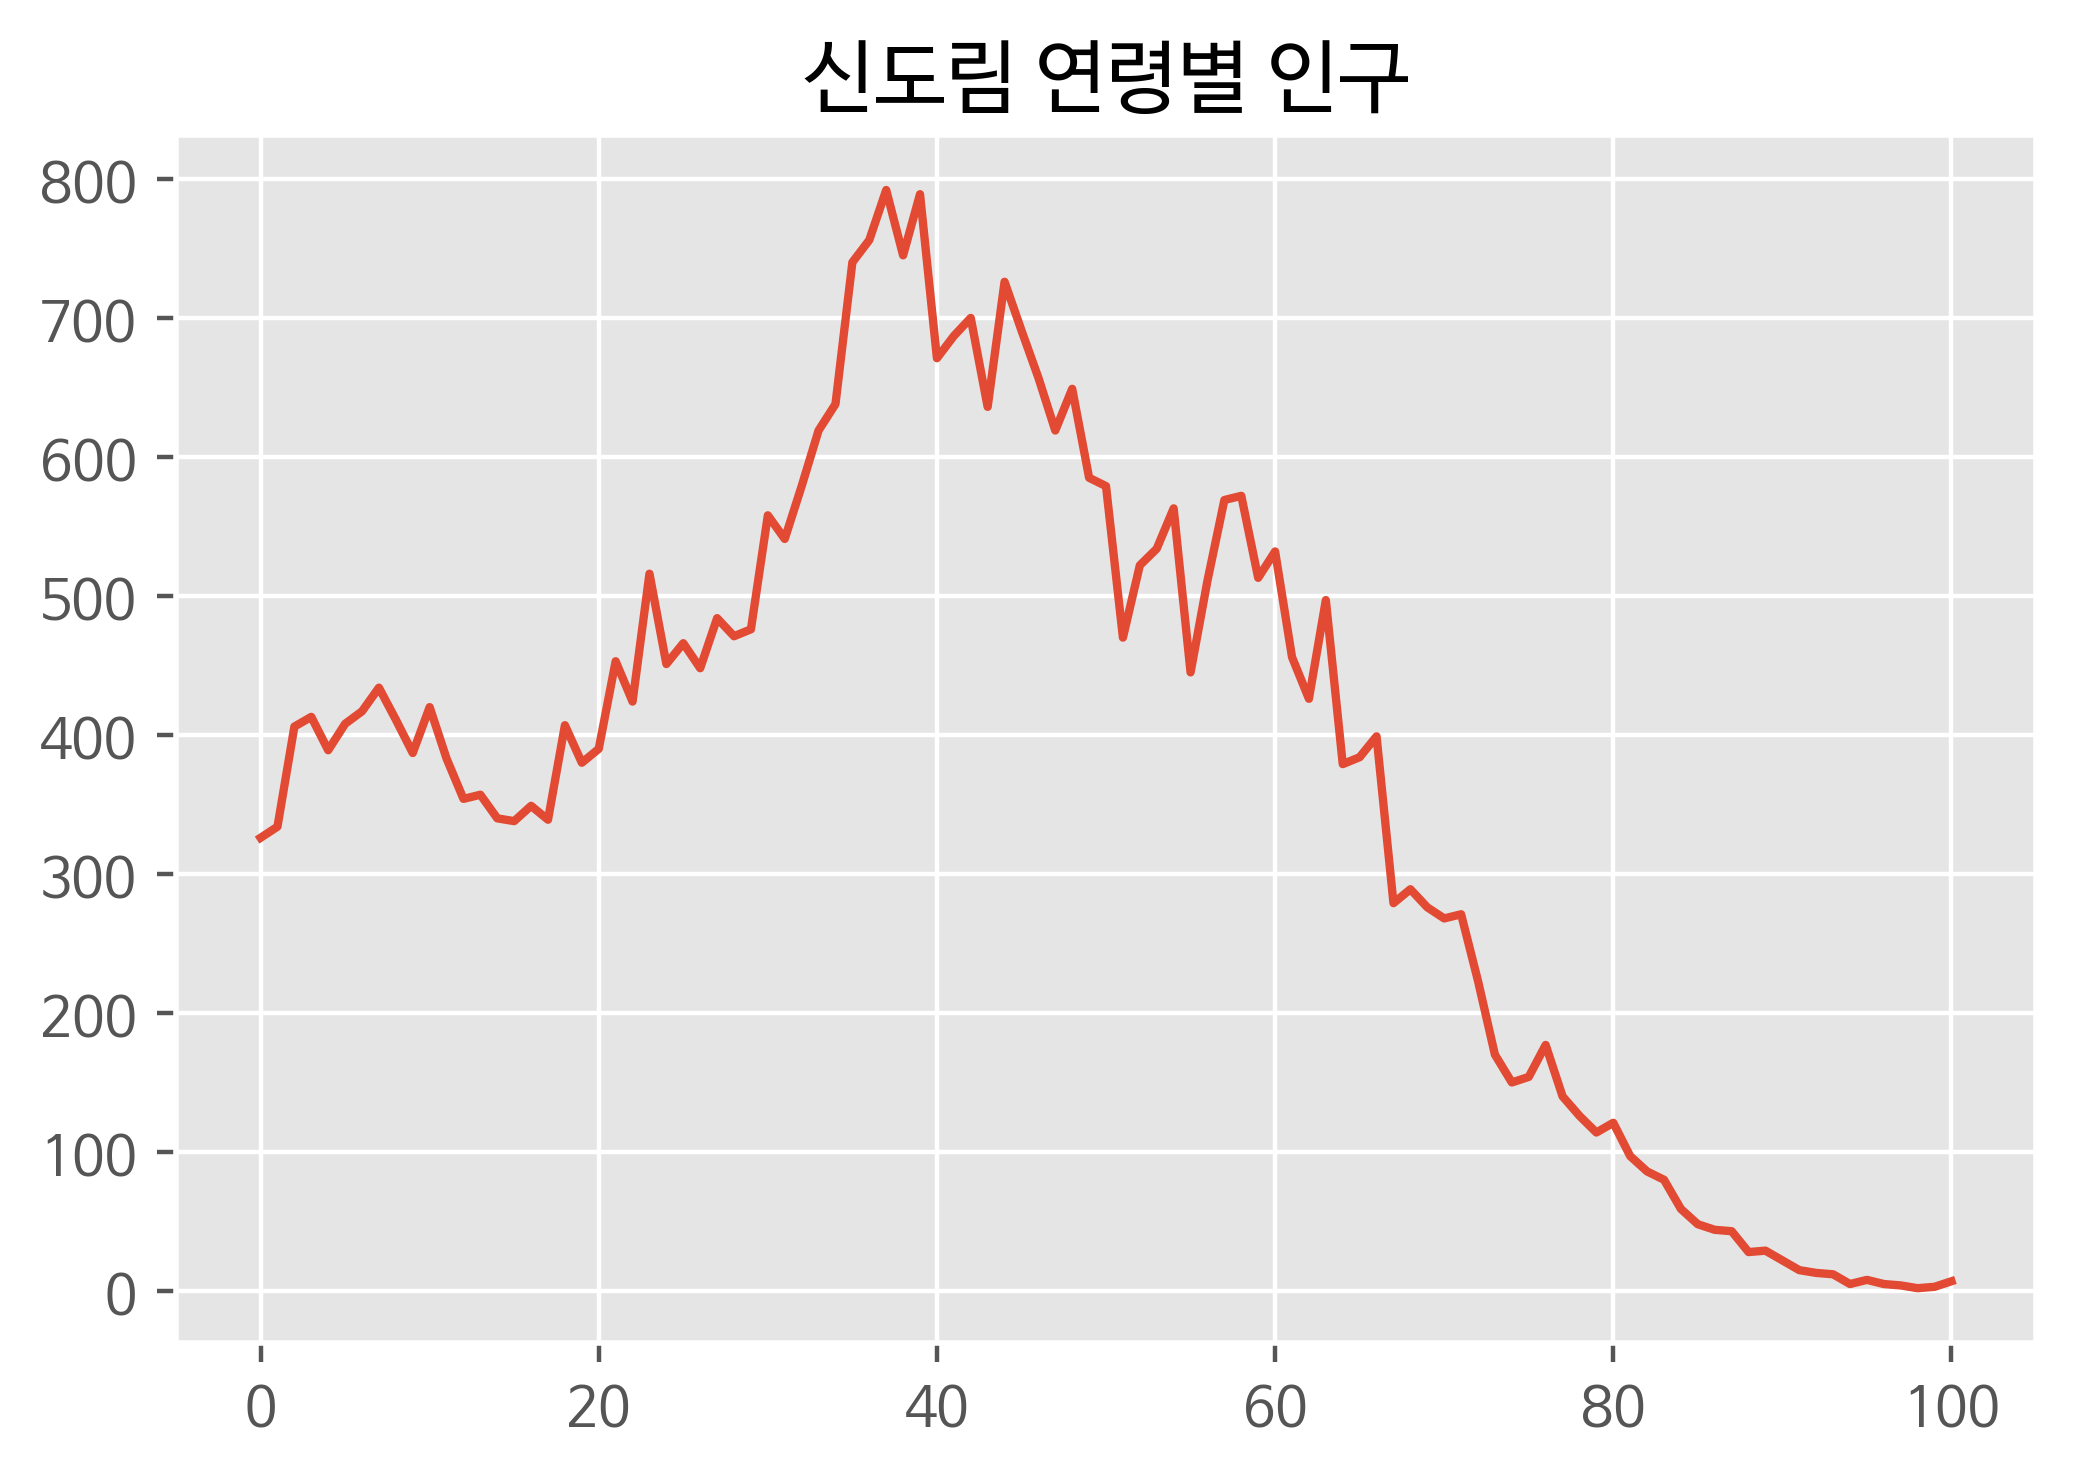

In [5]:
plt.figure(dpi = 200)
plt.title('신도림 연령별 인구')
plt.style.use('ggplot')   # 격자 무늬, classic, dark_background, ggplot
plt.plot(result)
plt.show()

matplotlib 다양한 스타일 확인

In [7]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
